#**RでYahoo! finance (USA)を利用する**

このColabノートブックでは、ライブラリquantmodを使って、Yahoo! finance (USA)を利用する方法を説明します。quantmodを使うと、Yahoo! finance (USA)の株価データを簡単にダウンロードして利用できます。

公式サイト：<br>http://www.quantmod.com/examples/intro/
<br>
<br>
なお、このノートブックは「[Rの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。

> 注意：Yahoo!ファイナンス (Japan)は、スクレイピング（getSymbols等を使ってデータをダウンロードすること）を禁止しているため使用しないでください。Yahoo!ファイナンス (Japan)はtickerを調べるときだけ使用します。Yahoo! finance (USA)ではスクレイピングは禁止されていないようです。

In [1]:
# ライブラリquantmodをインストールします。最初に少し時間がかかります
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [2]:
# 最初に必要なライブラリを読み込みます
rm(list=ls())
library(quantmod)
library(tidyverse)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()



最初にデータを取得する期間を指定します。start.dateが開始時期、end.dateが終了時期（end.date）で、"西暦-月-日"というフォーマットで書きます。たとえば、"2021-1-1"は2021年1月1日です。また、Sys.Date()は今日の日付を出力する関数です。



In [17]:
# 開始時期を2021年1月1日、終了時期を今日にします。
start.date <- "2021-01-01"
end.date <- Sys.Date()


実際にデータ取得します。tickerには取得したいデータの略称を代入します。

たとえば、日経平均（日経225平均株価指数）はN225、博報堂は2433.T、電通は4324.T、マルハニチロは1333.T、円ドル為替レートはJPY=Xです。これらのtickerはGoogleで検索すると分かります。

In [25]:
# 日経平均=^N225
ticker <-  c("^N225")
nikkei225 <- getSymbols(ticker, from = start.date, to = end.date, 
auto.assign = FALSE)

# 博報堂=2433.T
ticker <-  c("2433.T")
haku <- getSymbols(ticker, src = "yahoo", from = start.date, to = end.date, 
auto.assign = FALSE)

# 電通=4324.T
ticker <-  c("4324.T")
dentsu <- getSymbols(ticker, src = "yahoo", from = start.date, to = end.date, 
auto.assign = FALSE)

# マルハニチロ=1333.T
ticker <-  c("1333.T")
maruha <- getSymbols(ticker, src = "yahoo", from = start.date, to = end.date, 
auto.assign = FALSE)

# 円ドルレート
ticker <-  c("JPY=X")
yenDollar <- getSymbols(ticker, src = "yahoo", from = start.date, to = end.date, 
auto.assign = FALSE)


tail()関数を使って、データがきちんと取得できているか確認します。

In [26]:
#rm(list=ls())
nikkei225 %>% tail()
haku %>% tail()
dentsu %>% tail()
maruha %>% tail()
yenDollar %>% tail()


           N225.Open N225.High N225.Low N225.Close N225.Volume N225.Adjusted
2022-04-21  27259.14  27580.64 27252.83   27553.06    62300000      27553.06
2022-04-22  27197.80  27205.83 26904.38   27105.26    58500000      27105.26
2022-04-25  26692.48  26764.48 26487.84   26590.78    62700000      26590.78
2022-04-26  26743.21  26808.99 26592.99   26700.11    64300000      26700.11
2022-04-27  26313.14  26406.62 26051.04   26386.63    97300000      26386.63
2022-04-28  26430.28  26876.95 26348.36   26847.90           0      26847.90

           2433.T.Open 2433.T.High 2433.T.Low 2433.T.Close 2433.T.Volume
2022-04-21        1538        1560       1536         1556        480700
2022-04-22        1524        1533       1506         1526        465500
2022-04-25        1503        1538       1497         1527        415400
2022-04-26        1532        1541       1518         1525        470400
2022-04-27        1494        1509       1481         1501        872600
2022-04-28        1508        1546       1494         1540        474800
           2433.T.Adjusted
2022-04-21            1556
2022-04-22            1526
2022-04-25            1527
2022-04-26            1525
2022-04-27            1501
2022-04-28            1540

           4324.T.Open 4324.T.High 4324.T.Low 4324.T.Close 4324.T.Volume
2022-04-21        4895        4955       4880         4915        758100
2022-04-22        4850        4875       4790         4855        888600
2022-04-25        4795        4810       4725         4795        874600
2022-04-26        4775        4825       4745         4750        941700
2022-04-27        4655        4695       4585         4640       1169900
2022-04-28        4615        4725       4580         4705       1112200
           4324.T.Adjusted
2022-04-21            4915
2022-04-22            4855
2022-04-25            4795
2022-04-26            4750
2022-04-27            4640
2022-04-28            4705

           1333.T.Open 1333.T.High 1333.T.Low 1333.T.Close 1333.T.Volume
2022-04-21        2411        2421       2387         2393        142700
2022-04-22        2373        2386       2364         2375        120600
2022-04-25        2350        2367       2341         2359        144400
2022-04-26        2370        2398       2370         2382        129300
2022-04-27        2368        2373       2315         2324        365600
2022-04-28        2337        2402       2336         2396        181600
           1333.T.Adjusted
2022-04-21            2393
2022-04-22            2375
2022-04-25            2359
2022-04-26            2382
2022-04-27            2324
2022-04-28            2396

           JPY=X.Open JPY=X.High JPY=X.Low JPY=X.Close JPY=X.Volume
2022-04-21    128.013    128.696   127.827     128.013            0
2022-04-22    128.408    129.059   127.807     128.408            0
2022-04-25    128.605    128.822   127.525     128.605            0
2022-04-26    127.744    128.188   127.044     127.744            0
2022-04-27    127.266    128.578   127.259     127.266            0
2022-04-28    128.460    131.010   128.320     130.860            0
           JPY=X.Adjusted
2022-04-21        128.013
2022-04-22        128.408
2022-04-25        128.605
2022-04-26        127.744
2022-04-27        127.266
2022-04-28        130.860

quantmodにはchartSeries()という株価をグラフにしてくれる関数があるので、ちょっと使ってみましょう（単にグラフにするだけならこのchartSeries()で十分です）。

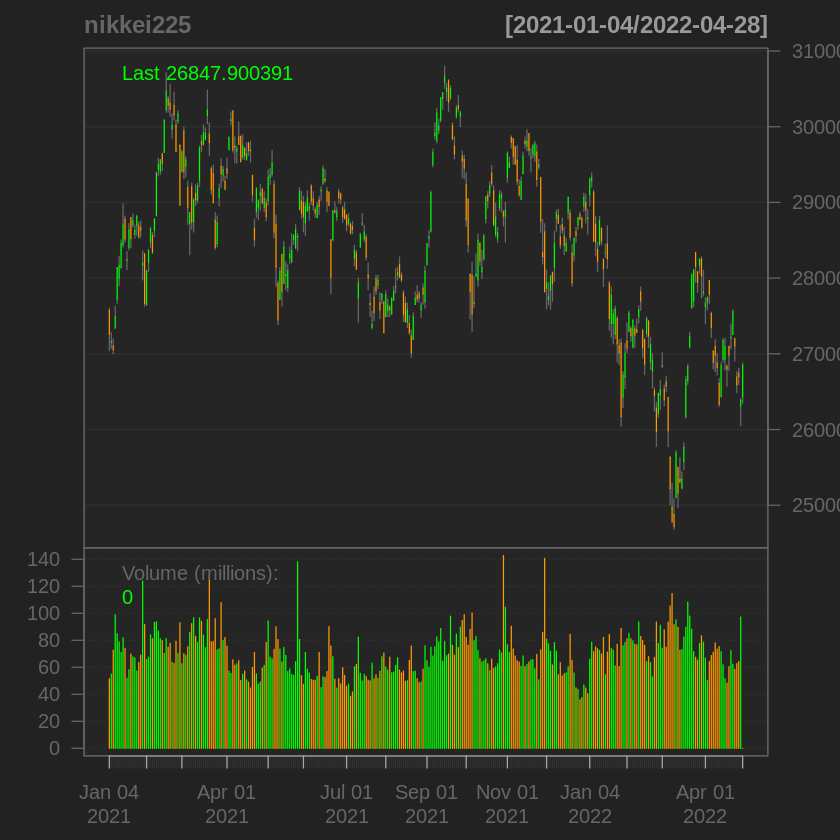

In [27]:
chartSeries(nikkei225)

次に対数差分（値を対数に変換して、差分を取る）を計算します。たとえば、nikkeiDailyReturn100は日経平均の日次収益率（％表示）です。対数差分は変化率の近似として使うことができます。

補足：対数差分が変化率の近似になるというのは便利なテクニックなので、覚えておくといいでしょう。

In [28]:
nikkei225$N225.Close %>% log() %>% diff() -> nikkeiDailyReturn
nikkeiDailyReturn100 <- nikkeiDailyReturn * 100

haku[,"2433.T.Close"]  %>% log() %>% diff() -> hakuDailyReturn
hakuDailyReturn100 <- hakuDailyReturn * 100

dentsu[,"4324.T.Close"]  %>% log() %>% diff() -> dentsuDailyReturn
dentsuDailyReturn100 <- dentsuDailyReturn * 100

maruha[,"1333.T.Close"]  %>% log() %>% diff() -> maruhaDailyReturn
maruhaDailyReturn100 <- maruhaDailyReturn * 100

yenDollar[,"JPY=X.Close"]  %>% log() %>% diff() -> ydDailyReturn
ydDailyReturn * 100 -> ydDailyReturn100 


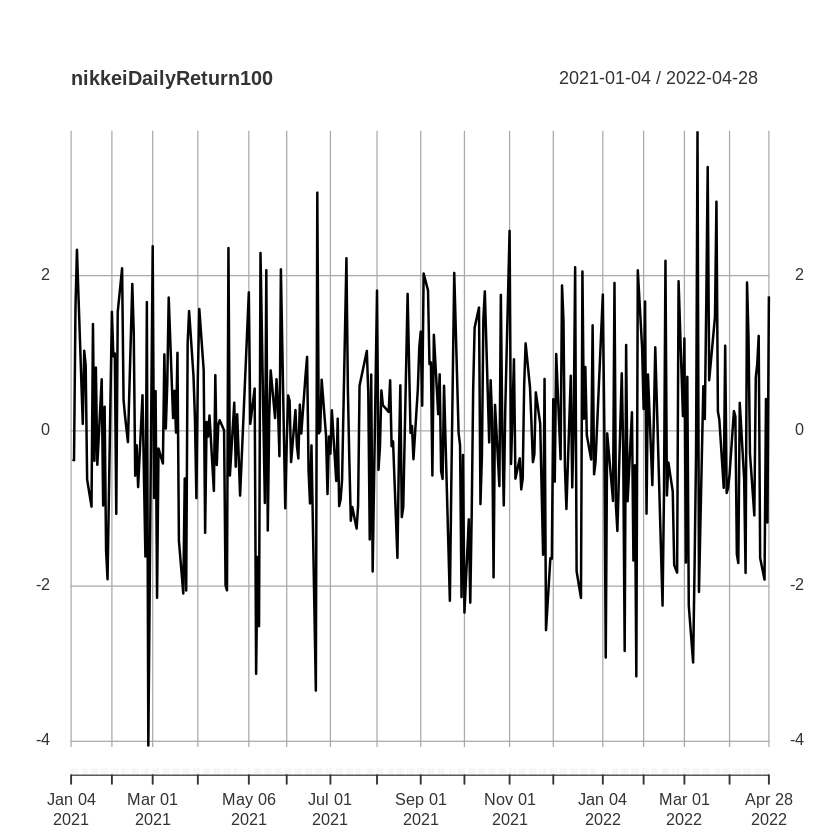

In [29]:
plot(nikkeiDailyReturn100)

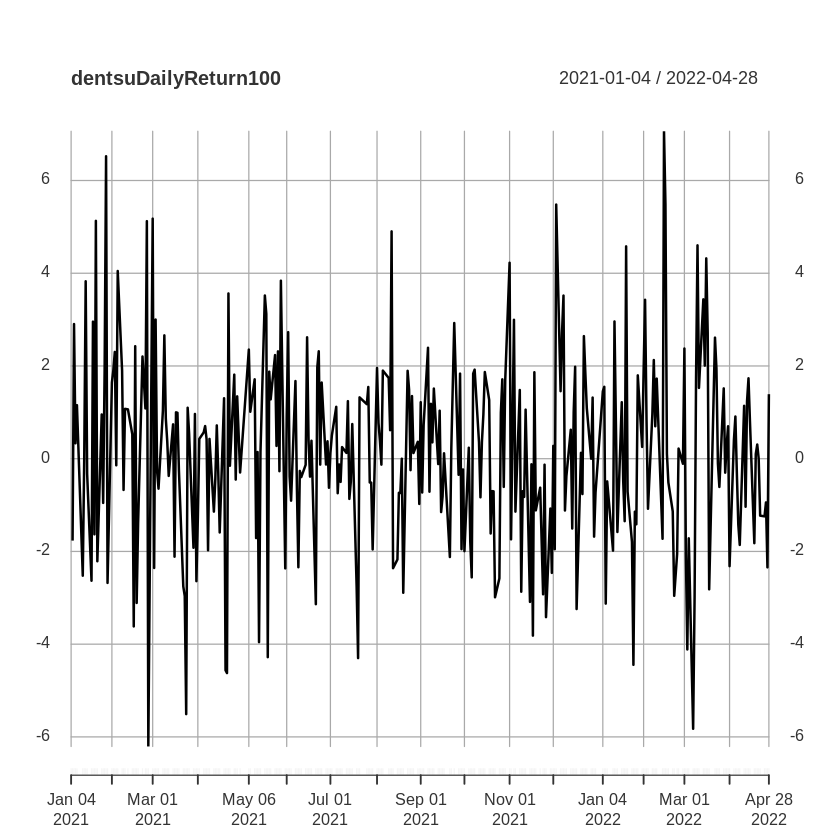

In [30]:
plot(dentsuDailyReturn100)

In [31]:
lm(hakuDailyReturn100 ~ maruhaDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ maruhaDailyReturn100)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8111  -1.0571  -0.0844   1.1971   6.3026 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.01643    0.10505   0.156    0.876    
maruhaDailyReturn100  0.63653    0.07266   8.761   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.888 on 321 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.193,	Adjusted R-squared:  0.1904 
F-statistic: 76.75 on 1 and 321 DF,  p-value: < 2.2e-16


In [32]:
lm(hakuDailyReturn100 ~ dentsuDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ dentsuDailyReturn100)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1243  -1.0352   0.0621   1.0376   6.0509 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.05406    0.09288  -0.582    0.561    
dentsuDailyReturn100  0.61212    0.04440  13.786   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.665 on 321 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3719,	Adjusted R-squared:  0.3699 
F-statistic: 190.1 on 1 and 321 DF,  p-value: < 2.2e-16


In [33]:
lm(hakuDailyReturn100 ~ nikkeiDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ nikkeiDailyReturn100)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5945  -0.9020  -0.0028   0.8528   6.6408 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.03793    0.09155   0.414    0.679    
nikkeiDailyReturn100  1.03561    0.07276  14.233   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.645 on 321 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3869,	Adjusted R-squared:  0.385 
F-statistic: 202.6 on 1 and 321 DF,  p-value: < 2.2e-16


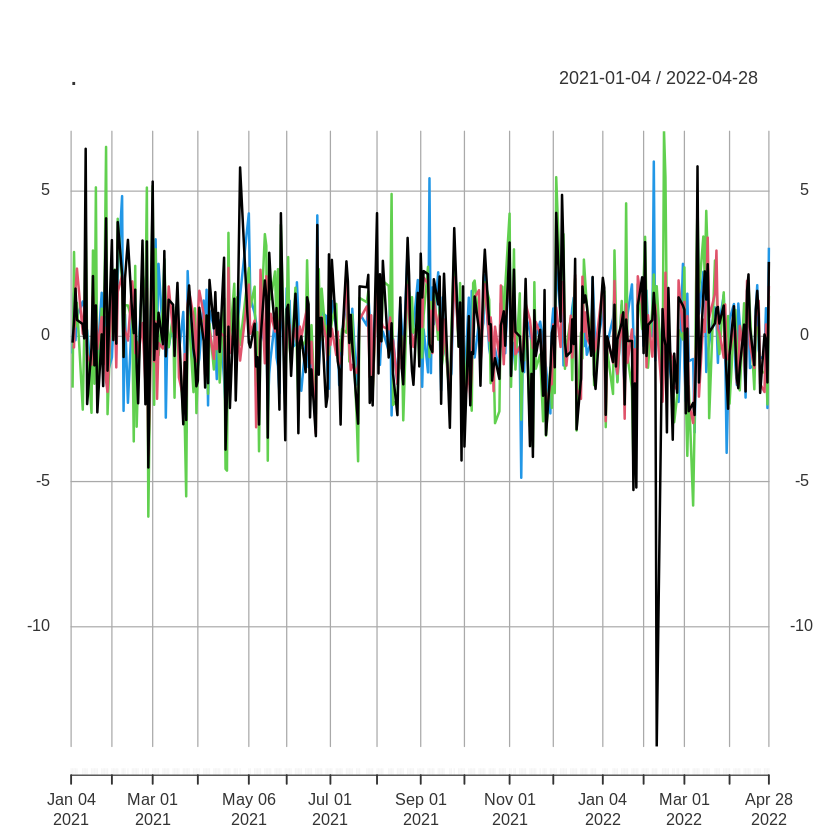

In [34]:
cbind(hakuDailyReturn100, nikkeiDailyReturn100, dentsuDailyReturn100, maruhaDailyReturn100) -> dataSet
dataSet %>% plot()
#https://stackoverflow.com/questions/8979241/can-i-write-an-xts-object-using-write-csv-in-r
write.zoo(dataSet, file="経済統計a_13_dataset.csv", sep=",")
#write.csv(dataSet, file="経済統計a_13_dataset.csv")


In [35]:
is.xts(hakuDailyReturn100)
# Lengthes are different.
#length(ydDailyReturn100)
#length(hakuDailyReturn100)
#lm(hakuDailyReturn100 ~ ydDailyReturn100) %>% summary()

[1] TRUE